In [1]:
print("koko")

koko


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [14]:
img= cv2.imread("img.webp",cv2.IMREAD_GRAYSCALE)

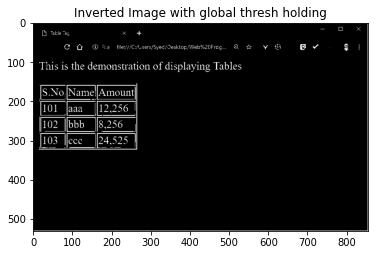

In [15]:
thresh,img_bin = cv2.threshold(img,128,255,cv2.THRESH_BINARY)
img_bin = 255-img_bin
plotting = plt.imshow(img_bin,cmap='gray')
plt.title("Inverted Image with global thresh holding")
plt.show()

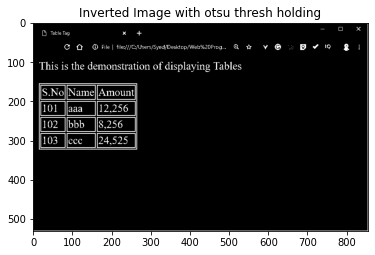

In [16]:
img_bin2 = 255-img
thresh1,img_bin_otsu = cv2.threshold(img_bin2,128,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plotting = plt.imshow(img_bin_otsu,cmap='gray')
plt.title("Inverted Image with otsu thresh holding")
plt.show()

In [17]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

In [18]:
kernel

array([[1, 1],
       [1, 1]], dtype=uint8)

In [30]:
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, np.array(img).shape[1]//150))
eroded_image = cv2.erode(img_bin, vertical_kernel, iterations=5)


In [31]:
vertical_lines = cv2.dilate(eroded_image, vertical_kernel, iterations=5)

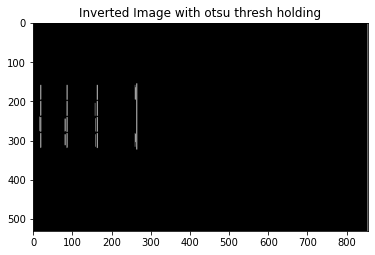

In [32]:
plotting = plt.imshow(vertical_lines,cmap='gray')
plt.title("Inverted Image with otsu thresh holding")
plt.show()

In [56]:
hor_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, ( np.array(img).shape[1]//150,1))
eroded_hor_image = cv2.erode(img_bin, hor_kernel, iterations=5)


In [57]:
horizontal_lines = cv2.dilate(eroded_hor_image, hor_kernel, iterations=5)

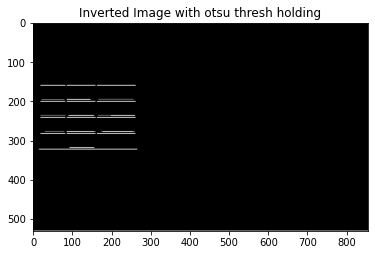

In [58]:
plotting = plt.imshow(horizontal_lines,cmap='gray')
plt.title("Inverted Image with otsu thresh holding")
plt.show()

In [59]:
vertical_horizontal_lines = cv2.addWeighted(vertical_lines, 0.5, horizontal_lines, 0.5, 0.0)
vertical_horizontal_lines = cv2.erode(~vertical_horizontal_lines, kernel, iterations=3)

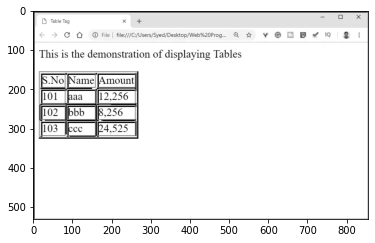

In [60]:
thresh, vertical_horizontal_lines = cv2.threshold(vertical_horizontal_lines,128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
b_image = cv2.bitwise_not(cv2.bitwise_xor(img,vertical_horizontal_lines))
plotting = plt.imshow(b_image,cmap='gray')
plt.show()

In [61]:
contours, hierarchy = cv2.findContours(vertical_horizontal_lines, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [63]:
boundingBoxes = [cv2.boundingRect(c) for c in contours]
(contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),
key=lambda x:x[1][1]))

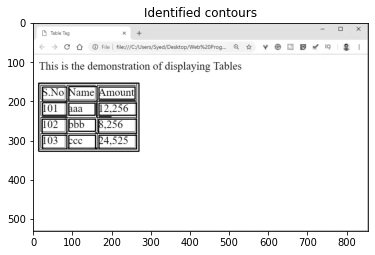

In [64]:
boxes = []
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if (w<1000 and h<500):
        image = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
        boxes.append([x,y,w,h])
plotting = plt.imshow(image,cmap='gray')
plt.title("Identified contours")
plt.show()

In [65]:
rows=[]
columns=[]
heights = [boundingBoxes[i][3] for i in range(len(boundingBoxes))]
mean = np.mean(heights)
print(mean)
columns.append(boxes[0])
previous=boxes[0]
for i in range(1,len(boxes)):
    if(boxes[i][1]<=previous[1]+mean/2):
        columns.append(boxes[i])
        previous=boxes[i]
        if(i==len(boxes)-1):
            rows.append(columns)
    else:
        rows.append(columns)
        columns=[]
        previous = boxes[i]
        columns.append(boxes[i])
print("Rows")
for row in rows:
    print(row)

54.76190476190476
Rows
[[14, 153, 256, 174], [91, 162, 72, 37], [168, 163, 92, 31], [24, 163, 62, 36]]
[[168, 198, 93, 1], [162, 203, 1, 37], [24, 203, 62, 32], [168, 204, 96, 31], [91, 204, 67, 31]]
[[263, 239, 1, 1], [168, 239, 31, 1], [23, 239, 63, 1], [167, 245, 97, 36], [91, 245, 68, 31], [23, 245, 63, 36]]
[[159, 280, 4, 1], [168, 286, 96, 35], [91, 286, 68, 35], [24, 286, 62, 35]]


In [67]:
total_cells=0
for i in range(len(row)):
    if len(row[i]) > total_cells:
        total_cells = len(row[i])
print(total_cells)

4


In [68]:
center = [int(rows[i][j][0]+rows[i][j][2]/2) for j in range(len(rows[i])) if rows[0]]
print(center)
center=np.array(center)
center.sort()
print(center)

[161, 216, 125, 55]
[ 55 125 161 216]


In [69]:
boxes_list = []
for i in range(len(rows)):
    l=[]
    for k in range(total_cells):
        l.append([])
    for j in range(len(rows[i])):
        diff = abs(center-(rows[i][j][0]+rows[i][j][2]/4))
        minimum = min(diff)
        indexing = list(diff).index(minimum)
        l[indexing].append(rows[i][j])
    boxes_list.append(l)
for box in boxes_list:
    print(box)

[[[14, 153, 256, 174], [24, 163, 62, 36]], [[91, 162, 72, 37]], [], [[168, 163, 92, 31]]]
[[[24, 203, 62, 32]], [[91, 204, 67, 31]], [[162, 203, 1, 37]], [[168, 198, 93, 1], [168, 204, 96, 31]]]
[[[23, 239, 63, 1], [23, 245, 63, 36]], [[91, 245, 68, 31]], [[168, 239, 31, 1]], [[263, 239, 1, 1], [167, 245, 97, 36]]]
[[[24, 286, 62, 35]], [[91, 286, 68, 35]], [[159, 280, 4, 1]], [[168, 286, 96, 35]]]


In [72]:
dataframe_final=[]
for i in range(len(boxes_list)):
    for j in range(len(boxes_list[i])):
        s=''
    if(len(boxes_list[i][j])==0):
        dataframe_final.append(' ')
    else:
        for k in range(len(boxes_list[i][j])):
            y,x,w,h = boxes_list[i][j][k][0],boxes_list[i][j][k][1], boxes_list[i][j][k][2],boxes_list[i][j][k][3]
            roi = bitnot[x:x+h, y:y+w]
            kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 1))
            border = cv2.copyMakeBorder(roi,2,2,2,2, cv2.BORDER_CONSTANT,value=[255,255])
            resizing = cv2.resize(border, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
            dilation = cv2.dilate(resizing, kernel,iterations=1)
            erosion = cv2.erode(dilation, kernel,iterations=2)
            out = pytesseract.image_to_string(erosion)
            if(len(out)==0):
                out = pytesseract.image_to_string(erosion)
            s = s +" "+ out
        dataframe_final.append(s)
print(dataframe_final)

NameError: name 'bitnot' is not defined